In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')

In [9]:
df = pd.read_csv('/Users/mille/Desktop/NCHS_Major_Causes_of_Death.csv')



In [10]:
df.head()

,Year,Cause,Age_Adjusted_Death_Rate
0,2015,Heart Disease,168.5
1,2015,Cancer,158.5
2,2015,Stroke,37.6
3,2015,Accidents,43.2
4,2015,Influenza and Pneumonia,15.2


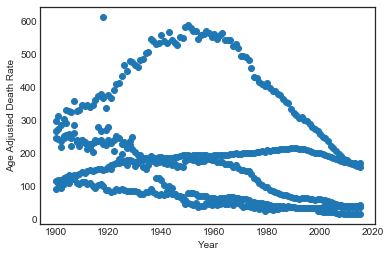

In [49]:
plt.scatter(x=df['Year'], y=df['Age_Adjusted_Death_Rate'])
plt.ylabel('Age Adjusted Death Rate')
plt.xlabel('Year')
plt.figure(figsize=(15, 25))

plt.show()

#Scatter plot - shows that the data is all over the place. Difficult to make any conclusion based on the scatter plot. 

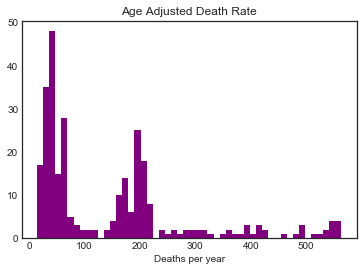

'Histogram of Age Adjusted Death Rate from 1900-2015. The histogram is skewed to the left meaning that, \nthere are high frequency of death rates between 0 and 200. Beyond 200 the death rate becomes less frequent. \n1) Where in the dataset is causing the histogram to be pulled to the left. '

In [200]:
plt.hist(df.Age_Adjusted_Death_Rate, bins=50, color='purple') 
plt.title('Age Adjusted Death Rate')
plt.xlabel('Deaths per year')
plt.show()

"""Histogram of Age Adjusted Death Rate from 1900-2015. The histogram is skewed to the left meaning that, 
there are high frequency of death rates between 0 and 200. Beyond 200 the death rate becomes less frequent. 
1) Where in the dataset is causing the histogram to be pulled to the left. """

C:\Users\mille\Conda3\lib\site-packages\numpy\lib\histograms.py:815: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


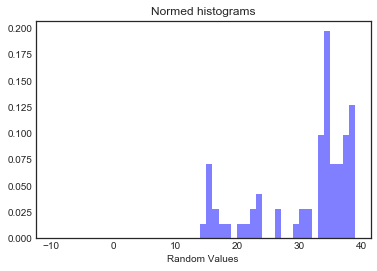

'The data is not normally distributed. \n1) Non-normal distributed data - is this a result of the mean? \n2) We would predict that the variance, standard deviation, and SE to be very high with this distribution.'

In [201]:
# Same data, this time normed.
plt.hist(df.Age_Adjusted_Death_Rate, normed=True, color='blue', bins=np.arange(-10, 40), alpha=.5) 
plt.hist(df.Year, normed=True, color='red', bins=np.arange(-10, 40), alpha=.5)
plt.title('Normed histograms')
plt.xlabel('Random Values')

plt.show()

"""The data is not normally distributed. 
1) Non-normal distributed data - is this a result of the mean? 
2) We would predict that the variance, standard deviation, and SE to be very high with this distribution."""

In [93]:
print(df.Age_Adjusted_Death_Rate.max())
print(df.Age_Adjusted_Death_Rate.min())

"""Since the range in values is from 14.5 to 612.4. Since the range is fairly large we would predict the mean to be influenced, 
heavily. """ 

612.4
14.5


In [78]:
np.mean(df['Age_Adjusted_Death_Rate'])


"""The mean is fairly high."""

181.9451724137931

In [79]:
np.median(df['Age_Adjusted_Death_Rate'])

"""The median value is 169.6, lower then the mean. Suggesting that the mean has been influence by top heavy values in the dataset."""

169.60000000000002

In [89]:
df['Age_Adjusted_Death_Rate'].var()
np.var(df.Age_Adjusted_Death_Rate)

""" A high variance indicates that the data points are very spread out from the mean, and from one another. 
Variance is the average of the squared distances from each point to the mean."""

20259.291752556466

In [90]:
np.std(df['Age_Adjusted_Death_Rate'], ddof=1)
"""A high standard deviation indicates that the data points are spread out over a large range of values"""

142.45800045540648

In [91]:
np.std(df['Age_Adjusted_Death_Rate'] ,ddof=1) / np.sqrt(len(df['Age_Adjusted_Death_Rate']))
"""High Standard Error means that data in the sample population is spread wide from the mean. """

5.915246503411769

In [98]:
df.groupby('Cause').describe()
"""Using groupby with 'Cause' creates a nice table. By looking at the data this way we can see that Heart Disease 116.0 404.802586
probably the reason causing our data problems. """

Age_Adjusted_Death_Rate                          \
                                          count        mean         std   
Cause                                                                     
Accidents                                 116.0   67.137931   25.068132   
Cancer                                    116.0  181.976724   24.736347   
Heart Disease                             116.0  404.802586  123.408374   
Influenza and Pneumonia                   116.0  104.987069  102.109821   
Stroke                                    116.0  150.821552   70.265106   

                                                                  Year  \
                           min      25%     50%      75%    max  count   
Cause                                                                    
Accidents                 33.2   39.950   66.90   84.575  122.3  116.0   
Cancer                   114.8  170.200  187.45  199.375  216.0  116.0   
Heart Disease            167.0  319.800  399.30  531.175  588.8  116.0   
Influenza and Pneumonia   14.5   33.875   47.40  181.850  612.4  116.0   
Stroke                    36.2   72.925  168.20  214.050  261.8  116.0   

                                                                              \
                           mean        std     min      25%     50%      75%   
Cause                                                                          
Accidents                1957.5  33.630343  1900.0  1928.75  1957.5  1986.25   
Cancer                   1957.5  33.630343  1900.0  1928.75  1957.5  1986.25   
Heart Disease            1957.5  33.630343  1900.0  1928.75  1957.5  1986.25   
Influenza and Pneumonia  1957.5  33.630343  1900.0  1928.75  1957.5  1986.25   
Stroke                   1957.5  33.630343  1900.0  1928.75  1957.5  1986.25   

                                 
                            max  
Cause                            
Accidents                2015.0  
Cancer                   2015.0  
Heart Disease            2015.0  
Influenza and Pneumonia  2015.0  
Stroke                   2015.0

C:\Users\mille\Conda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)
C:\Users\mille\Conda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


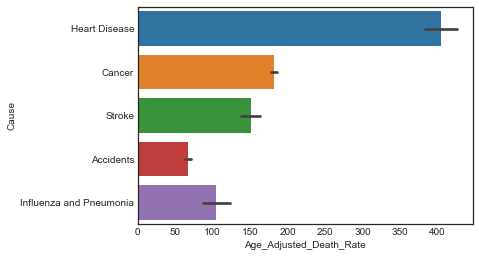

In [99]:
sns.barplot(x='Age_Adjusted_Death_Rate',y='Cause',data=df)

"""Seaborn barplot means with an error as the black line. In this figure it is very clear that Heart Disease is the 
leading cause of death since 1900. """

C:\Users\mille\Conda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)
C:\Users\mille\Conda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


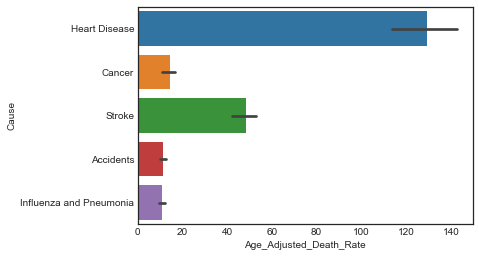

In [199]:
sns.barplot(x='Age_Adjusted_Death_Rate',y='Cause',data=df,estimator=np.std)
"""Seaborn barplot looking at the standard deviation, Heart Disease also sticks out. 
Suggests that significant spread in the heart disease data. """

C:\Users\mille\Conda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


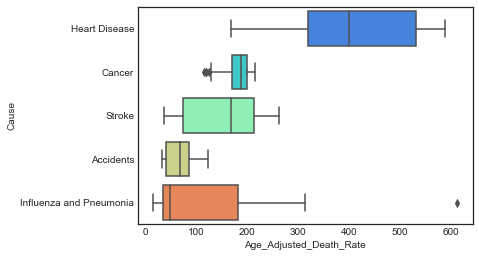

In [104]:
sns.boxplot(x='Age_Adjusted_Death_Rate',y='Cause', data=df,palette='rainbow')
"""Seaborn boxplots, show the range of the data for each Cause of death. 
As mentioned above heart disease has considerable spread in its data. Influenza and Pneumonia cause of death has an outlier that is near 600 deaths.
The outlier is due to Spanish flu in 1918 caused 600 documented deaths by the government. Even though it is an outlier compared to rest of the data, 
I would consider it might to include in the dataset. """

C:\Users\mille\Conda3\lib\site-packages\seaborn\categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
C:\Users\mille\Conda3\lib\site-packages\seaborn\categorical.py:826: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)
C:\Users\mille\Conda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


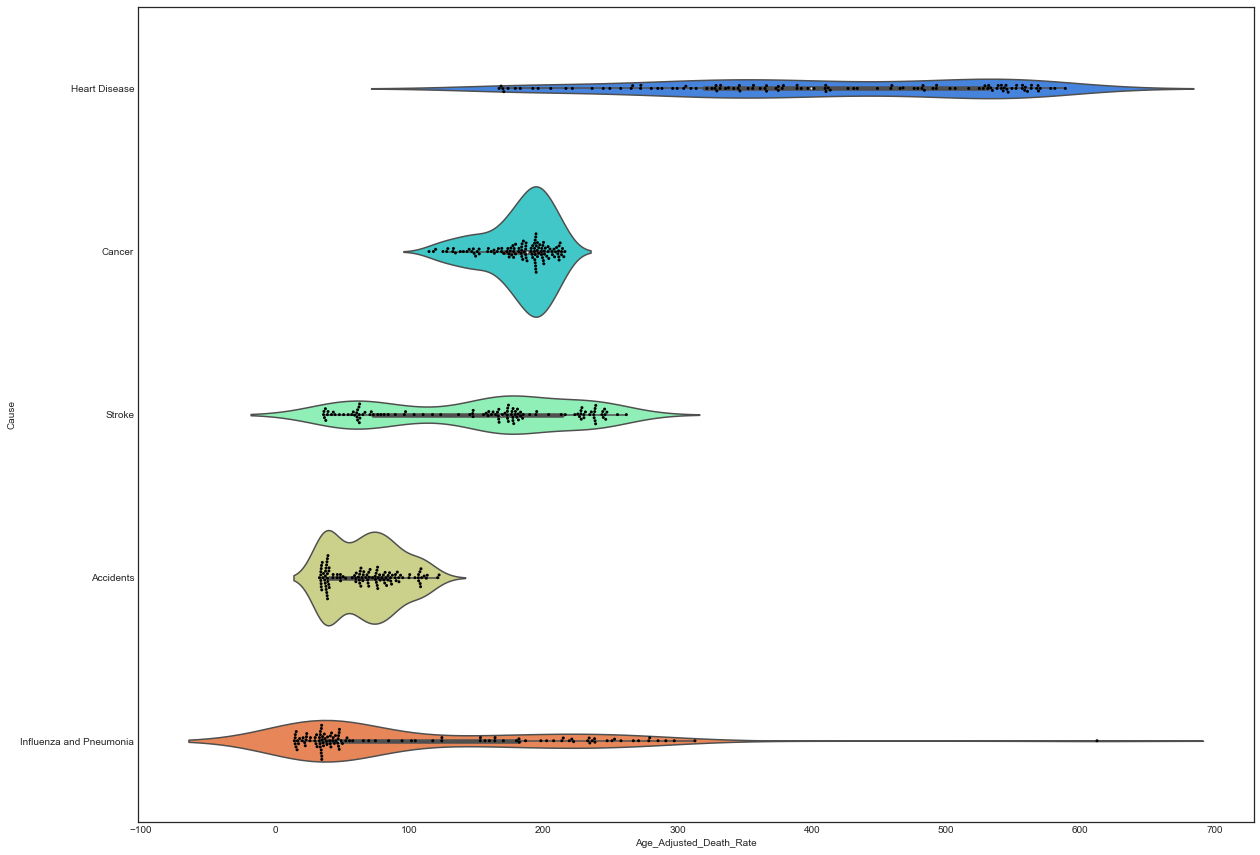

In [112]:
plt.subplots(figsize=(20,15))

sns.violinplot(x="Age_Adjusted_Death_Rate", y="Cause", data=df,palette='rainbow')
sns.swarmplot(x="Age_Adjusted_Death_Rate", y="Cause", data=df,color='black',size=3)


C:\Users\mille\Conda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


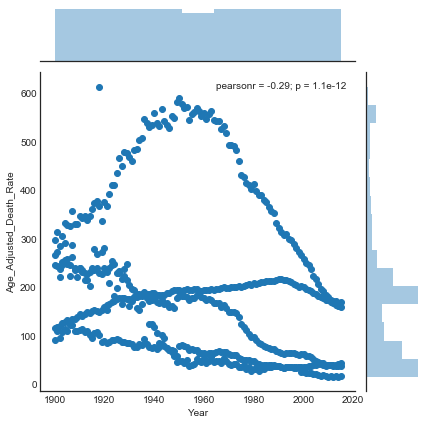

In [124]:
sns.jointplot(x='Year',y='Age_Adjusted_Death_Rate',data=df,kind='scatter')

"""This is a jointplot with a scatter plot and a histogram. This type of plot can give you extra insights in how the data is weighted in the graph. 
The pearsonr value is negative indicates that the regression will have a negative slope."""

C:\Users\mille\Conda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


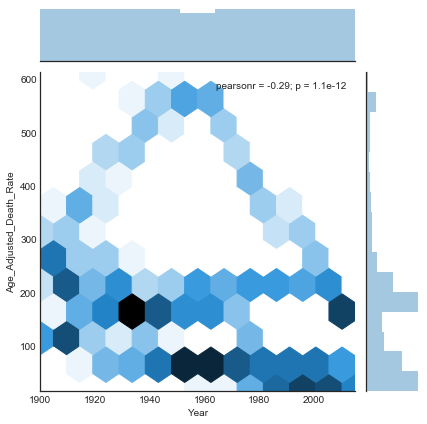

In [126]:
sns.jointplot(x='Year',y='Age_Adjusted_Death_Rate',data=df,kind='hex')

C:\Users\mille\Conda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


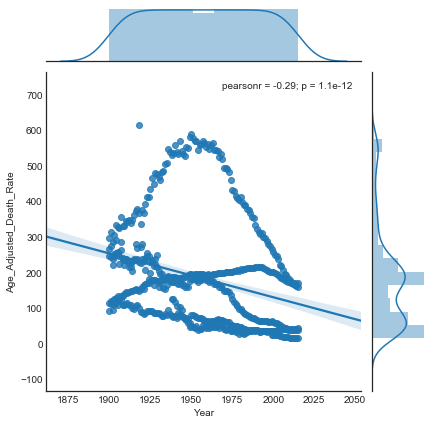

In [127]:
sns.jointplot(x='Year',y='Age_Adjusted_Death_Rate',data=df,kind='reg')

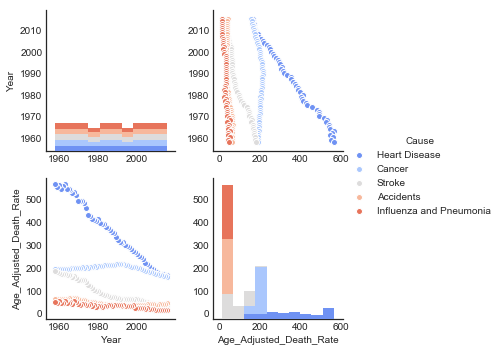

In [193]:
sns.pairplot(df,hue='Cause',palette='coolwarm')

"""This is a Seaborn Pairplot of histogram and scatter plots. 
This display of the data visualually give us a sense of how the causes of death maybe contributing the death rate per year."""

C:\Users\mille\Conda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


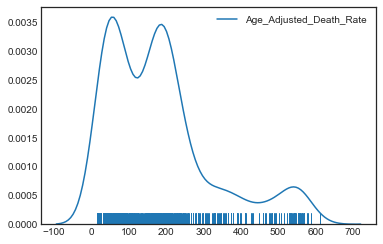

In [130]:
sns.kdeplot(df['Age_Adjusted_Death_Rate'])
sns.rugplot(df['Age_Adjusted_Death_Rate'])

"""The KDE and RUG plots provide information about the density of the data. The highest density corresponds to the highest frequency of the data around the mean."""

C:\Users\mille\Conda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


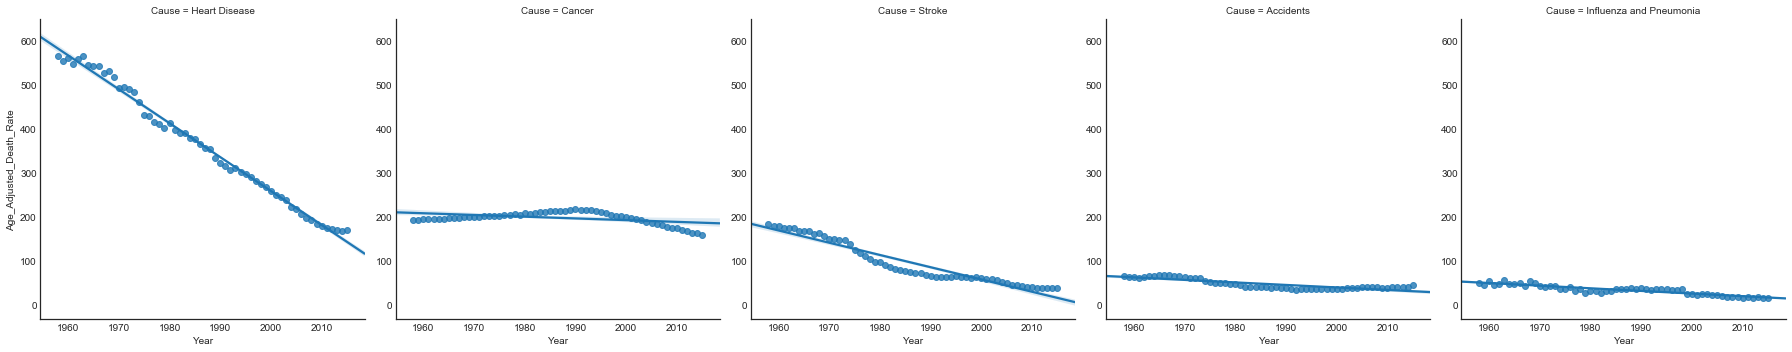

In [185]:
sns.lmplot(x='Year', y='Age_Adjusted_Death_Rate', data=df,col='Cause')

"""Seaborn lmplot plots multiple regression subplots. Using col we can compare all the Causes of death. 
The most interesting plot is the heart disease. Showing in the past 100 years there has been significant decline in heart disease related deaths."""

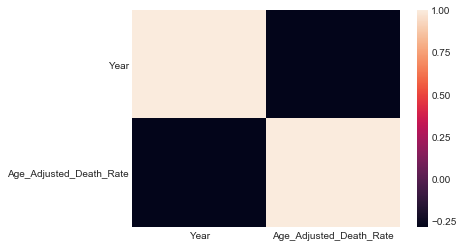

In [136]:
corr = df.corr()
sns.heatmap(corr)

"""Seaborn heatmap. With only two variables using a heatmap is pretty pointless. With a large multi-variate dataset a heatmap can visually show correlations within the data."""

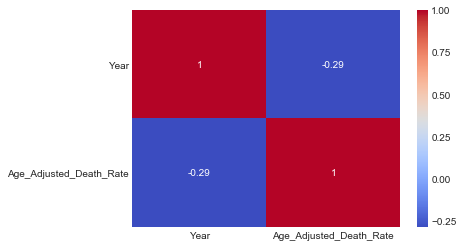

In [138]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)
"""Seaborn heatmap with correlation values. """

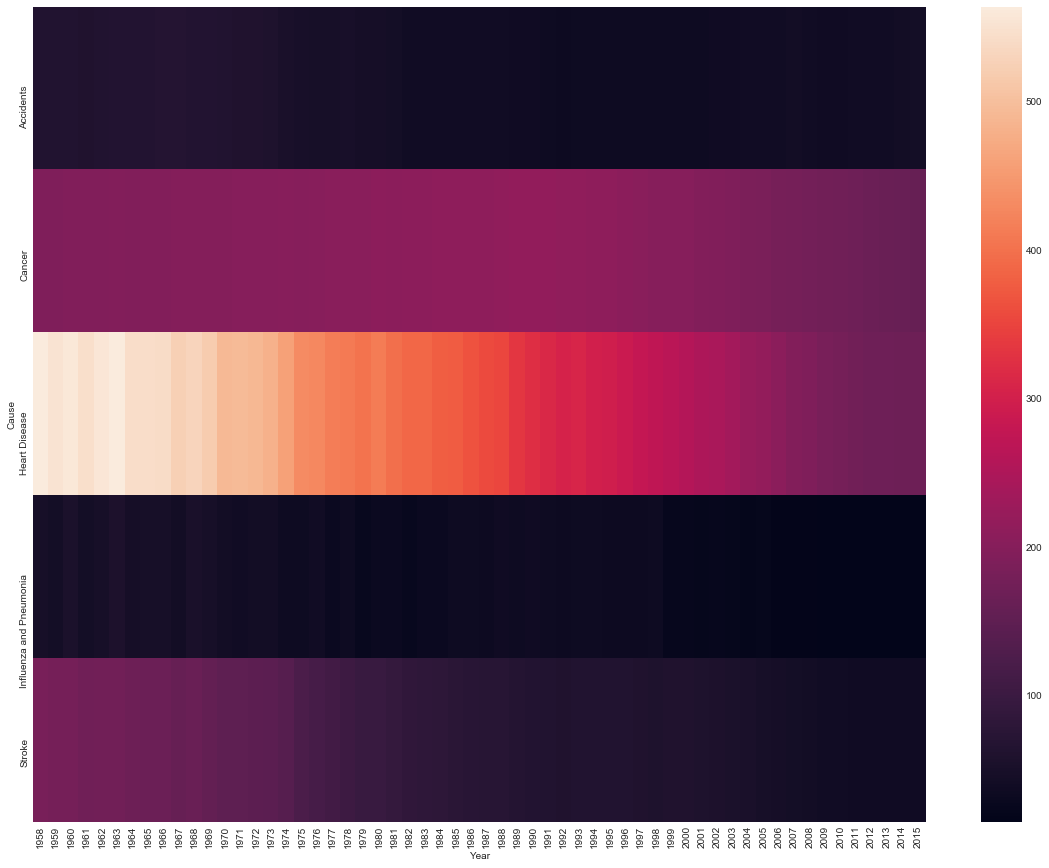

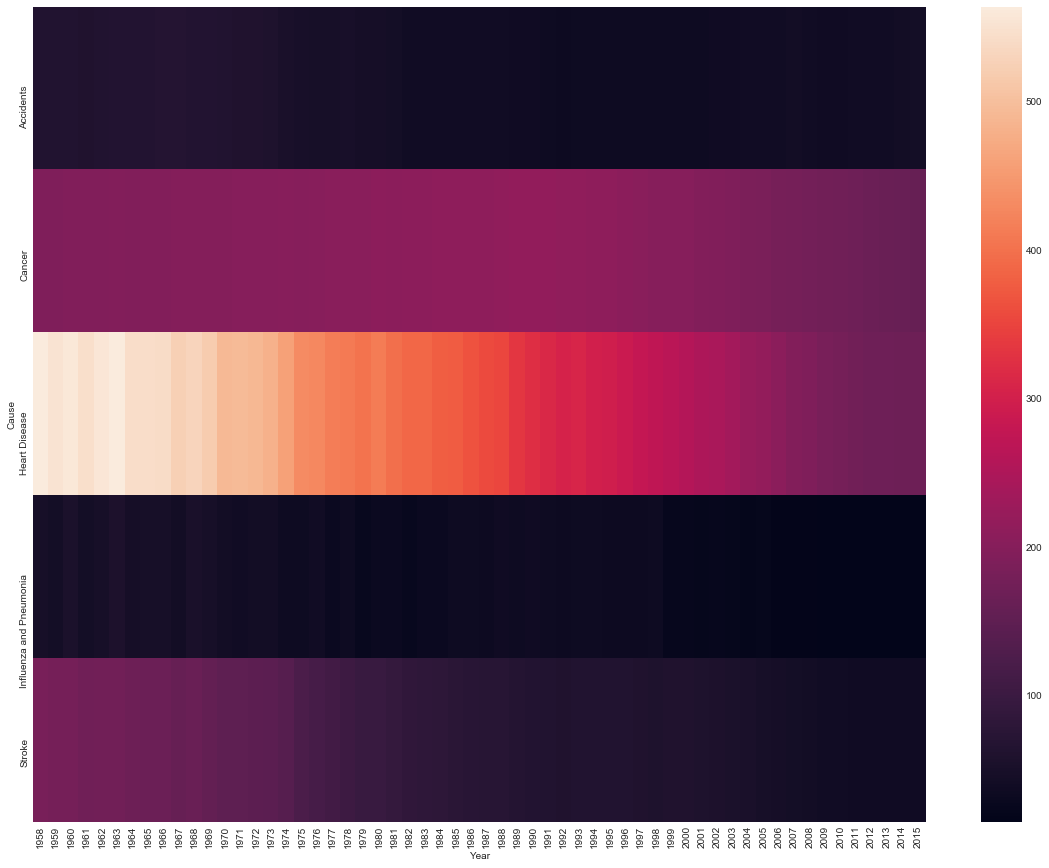

In [183]:
plt.subplots(figsize=(20,15))

deaths = df.pivot_table(values='Age_Adjusted_Death_Rate',index='Cause',columns='Year')
sns.heatmap(deaths)


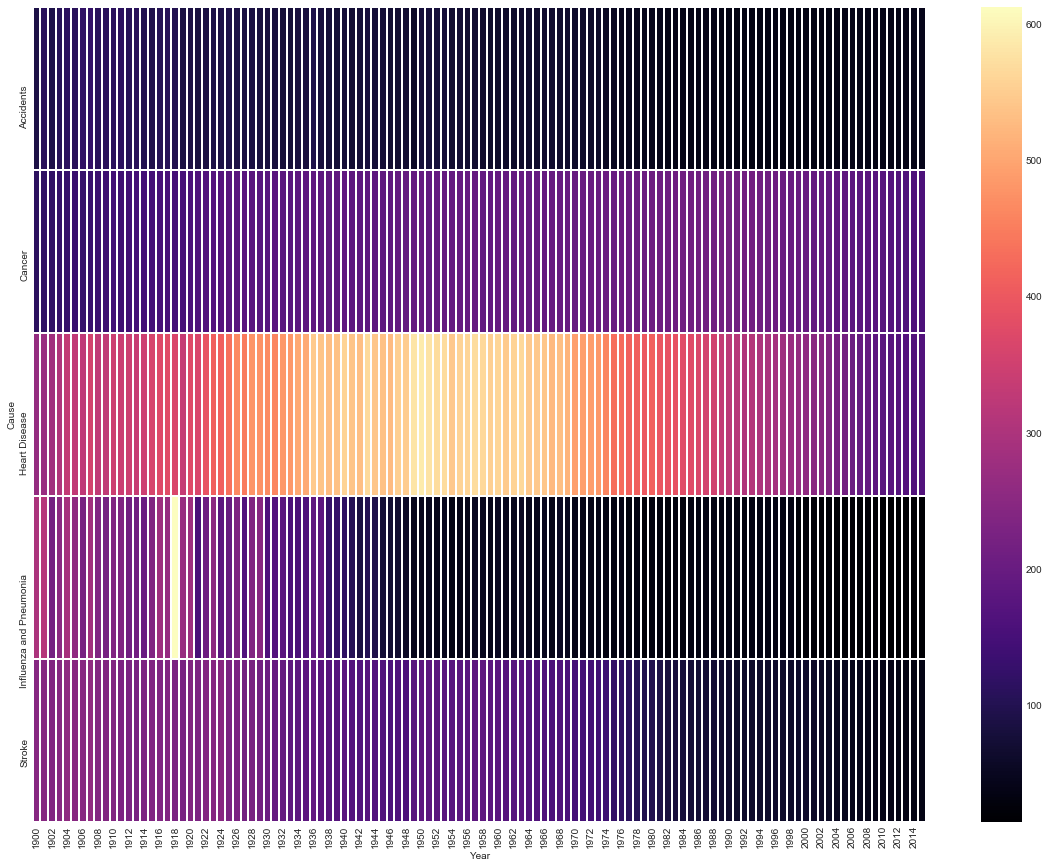

In [142]:
plt.subplots(figsize=(20,15))

sns.heatmap(deaths,cmap='magma',linecolor='white',linewidths=1)

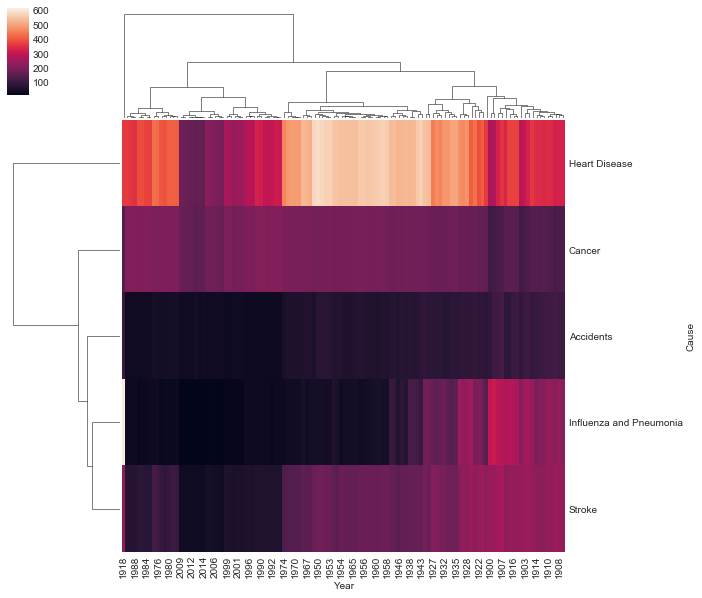

In [143]:
sns.clustermap(deaths)

"""Seaborn clustermap. The relationships among the cluster analysis in this figure maybe superfical since there are so few variables. """

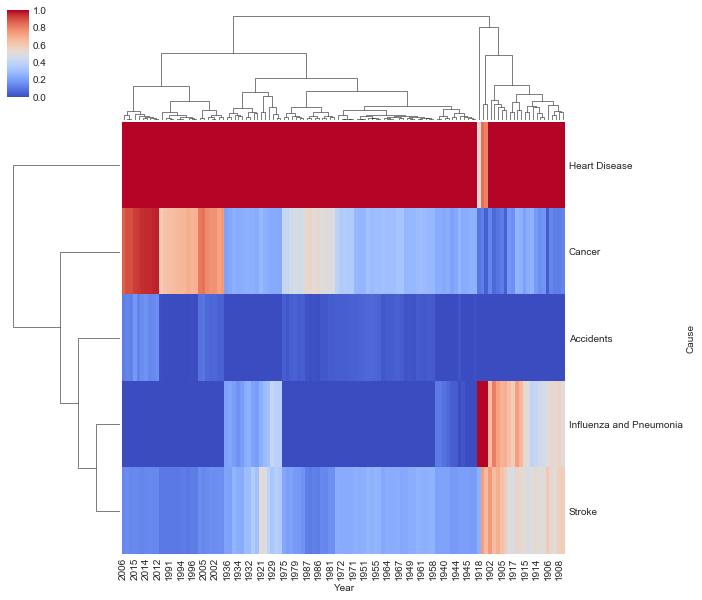

In [144]:
sns.clustermap(deaths,cmap='coolwarm',standard_scale=1)

"""Another Seaborn clustermap."""

In [180]:
est = smf.ols('Age_Adjusted_Death_Rate ~ Year', df).fit()
est.summary().tables[1]
"""Regression table that includes the intercept, coefficient, std err, t value, p value and confidence intervals. 
The relationships in this dataset do not fit a linear regression model. It was more of doing the test for practice."""

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,4933.7828,917.297,5.379,0.000,3128.327,6739.239
Year,-2.4101,0.462,-5.219,0.000,-3.319,-1.501


In [154]:
df[['Age_Adjusted_Death_Rate', 'Year']].describe()

,Age_Adjusted_Death_Rate,Year
count,580.000000,580.000000
mean,181.945172,1957.500000
std,142.458000,33.513975
min,14.500000,1900.000000
25%,63.900000,1928.750000
50%,169.600000,1957.500000
75%,228.325000,1986.250000
max,612.400000,2015.000000


(1900, 2016)

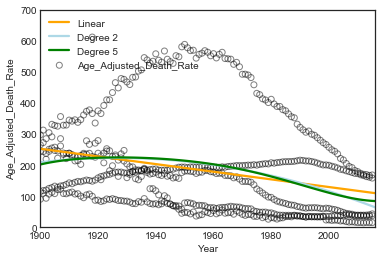

In [165]:
# With Seaborn's regplot() you can easily plot higher order polynomials.
plt.scatter(df.Year, df.Age_Adjusted_Death_Rate, facecolors='None', edgecolors='k', alpha=.5) 
sns.regplot(df.Year, df.Age_Adjusted_Death_Rate, ci=None, label='Linear', scatter=False, color='orange')
sns.regplot(df.Year, df.Age_Adjusted_Death_Rate, ci=None, label='Degree 2', order=2, scatter=False, color='lightblue')
sns.regplot(df.Year, df.Age_Adjusted_Death_Rate, ci=None, label='Degree 5', order=5, scatter=False, color='g')

plt.legend(loc='upper left', frameon=False)
# plt.legend()
plt.ylim(0,700)
plt.xlim(1900,2016)

"""Comparing linear and non-linear regression models. """